# Datasets with PyTorch

Notebook inspired from the Udemy course "PyTorch for Deep Learning with Python Bootcamp".

In this section we'll show how to:
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

At the end we'll briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

## Perform standard imports

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [4]:
df = pd.read_csv('./Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.shape

(150, 5)

## Plot the data

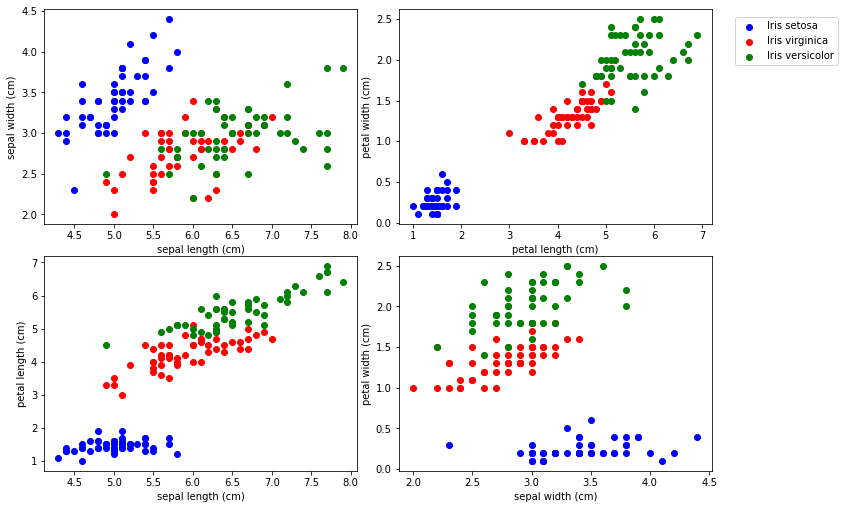

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)

In [8]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [9]:
X_train.size()

torch.Size([120, 4])

In [10]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>NOTE: </strong>It's up to us to remember which columns correspond to which features.</div>

## Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [11]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [12]:
len(iris)

150

In [13]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [14]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

#### The data loader class

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.
In contrast to the dataset class, we usually don't have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.


In [15]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [16]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[4.6000, 3.1000, 1.5000, 0.2000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [4.6000, 3.6000, 1.0000

In [18]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
data_inputs, data_labels = next(iter(iris_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)


Data inputs torch.Size([105, 4]) 
 tensor([[6.3000, 2.8000, 5.1000, 1.5000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [4.9000, 2.5000, 4.5000, 1.7000],

In [ ]:
# For iterating over the whole dataset, we can simple use "for batch in iris_loader: ..."
# Try this if you want
for data_inputs, data_labels in iris_loader:
    print("Data inputs", data_inputs.shape, "\n", data_inputs)
    print("Data labels", data_labels.shape, "\n", data_labels)
    break

## A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.